In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [50]:
data.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,...,False,False,False,True,False,False,False,False,True,False
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,...,False,False,False,True,False,False,False,False,True,False


# Structure of Data Set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
data.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Height and Weight Distribution

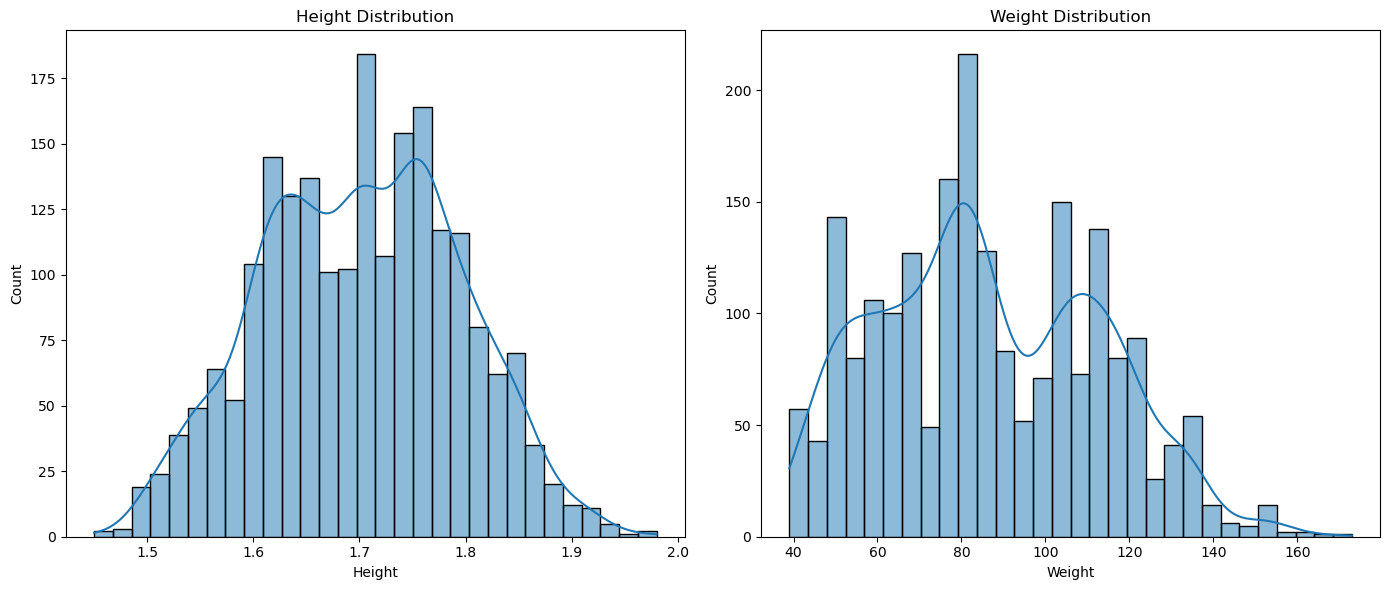

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Height'], kde=True, bins=30)
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], kde=True, bins=30)
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

# Top 10 Ages with Highest Weight

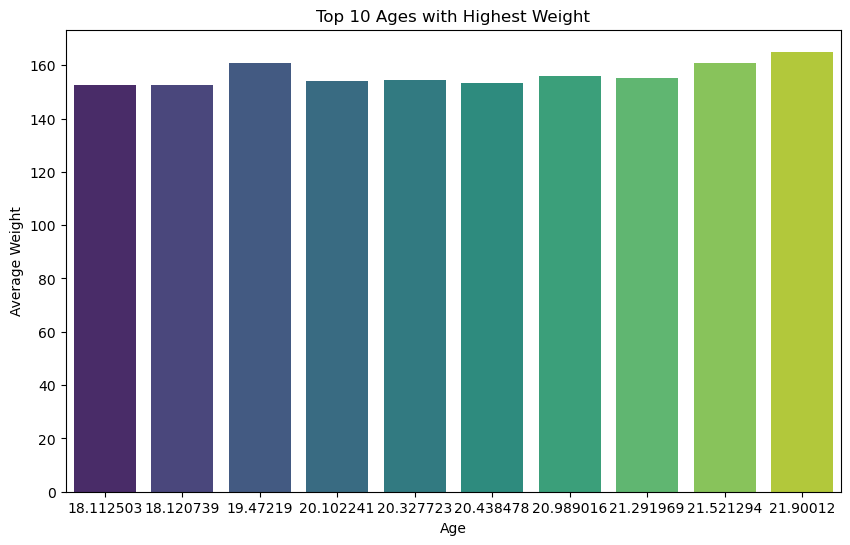

In [7]:
top_10_ages_weight = data.groupby('Age')['Weight'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_ages_weight.index, y=top_10_ages_weight.values, palette='viridis')
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.show()

# Distribution of CAEC values

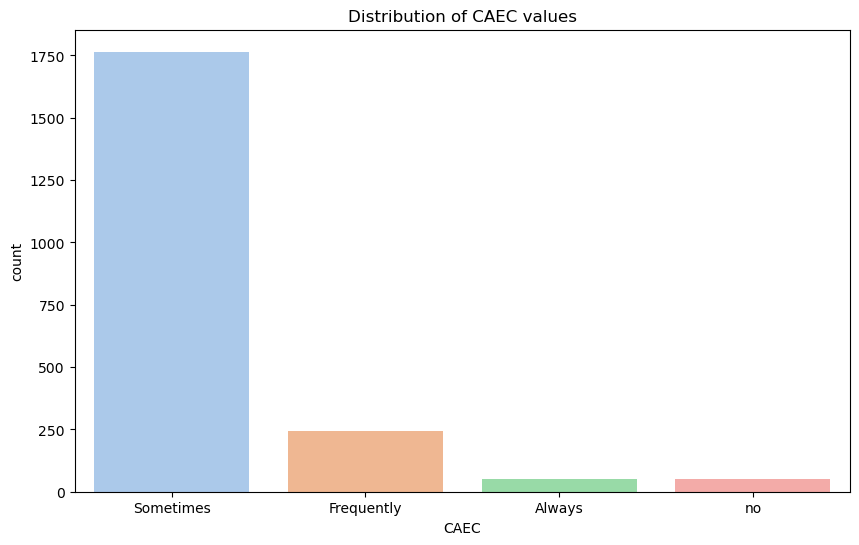

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CAEC', data=data, palette='pastel')
plt.title('Distribution of CAEC values')
plt.show()

# Average Ages with Family History with Overweight

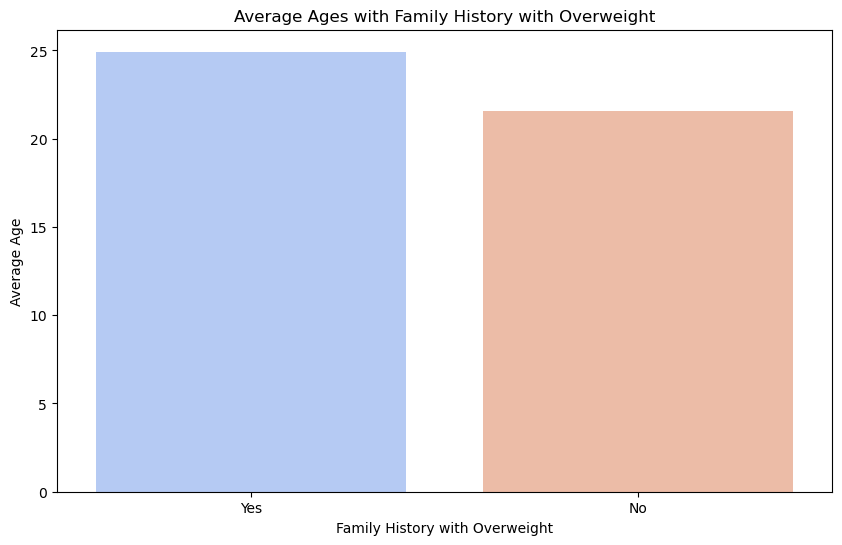

In [9]:
avg_age_family_history = data[data['family_history_with_overweight'] == 'yes']['Age'].mean()
avg_age_no_family_history = data[data['family_history_with_overweight'] == 'no']['Age'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Yes', 'No'], y=[avg_age_family_history, avg_age_no_family_history], palette='coolwarm')
plt.title('Average Ages with Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average Age')
plt.show()

# Correlation MAtrix

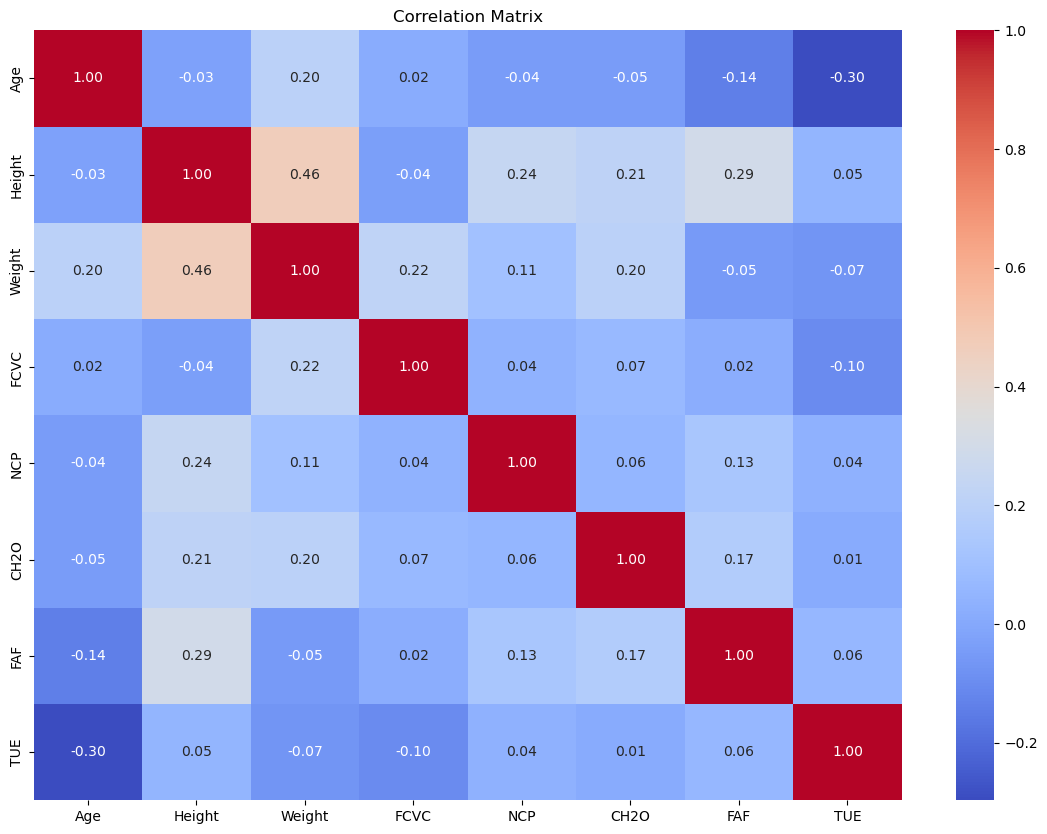

In [10]:
numeric_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  Data Preprocessing

In [12]:
# Identification of  categorical and continuous columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
continuous_cols = data.select_dtypes(include=['float64']).columns.tolist()

In [13]:
# Removing the target column from the list of categorical columns
categorical_cols.remove('NObeyesdad')


# Label Encoding

In [14]:
label_enc_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE']
label_enc = LabelEncoder()

for col in label_enc_cols:
    data[col] = label_enc.fit_transform(data[col])


# One Hot Encoding

In [15]:
onehot_enc_cols = list(set(categorical_cols) - set(label_enc_cols))
data = pd.get_dummies(data, columns=onehot_enc_cols)

In [16]:
# Splitting the data into features and target
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']


In [17]:
# Encoding the target column
y = label_enc.fit_transform(y)


In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
data.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,...,False,False,False,True,False,False,False,False,True,False
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,...,False,False,False,True,False,False,False,False,True,False


# Importing Necessary Liabraries

In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [34]:
# Ensure the data is in C-contiguous order
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)



# Initializing the classifiers

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store the results
results = {}


# Training and evaluating each classifier

In [35]:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Classification Report': report,
        'Confusion Matrix': confusion
    }



E:\Users\SUN RISE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Finding the Best Algo

best_algorithm = max(results, key=lambda name: results[name]['Classification Report']['accuracy'])

# Display of Results of Best Algos

In [37]:
best_algorithm, results[best_algorithm]

('Random Forest',
 {'Classification Report': {'0': {'precision': 1.0,
    'recall': 0.9642857142857143,
    'f1-score': 0.9818181818181818,
    'support': 56.0},
   '1': {'precision': 0.8529411764705882,
    'recall': 0.9354838709677419,
    'f1-score': 0.8923076923076922,
    'support': 62.0},
   '2': {'precision': 0.987012987012987,
    'recall': 0.9743589743589743,
    'f1-score': 0.9806451612903225,
    'support': 78.0},
   '3': {'precision': 1.0,
    'recall': 0.9827586206896551,
    'f1-score': 0.9913043478260869,
    'support': 58.0},
   '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 63.0},
   '5': {'precision': 0.9245283018867925,
    'recall': 0.875,
    'f1-score': 0.8990825688073395,
    'support': 56.0},
   '6': {'precision': 0.9411764705882353,
    'recall': 0.96,
    'f1-score': 0.9504950495049505,
    'support': 50.0},
   'accuracy': 0.9574468085106383,
   'macro avg': {'precision': 0.9579512765655148,
    'recall': 0.9559838829002979,
    'f1-score':

# Display of Results

In [49]:
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
classifier_names = list(results.keys())
scores = {metric: [] for metric in metrics}

for name, result in results.items():
    report = result['Classification Report']
    for metric in metrics[:-1]:  
        avg_scores = report['macro avg'][metric]
        scores[metric].append(avg_scores)
    scores['accuracy'].append(report['accuracy'])


metrics_df = pd.DataFrame(scores, index=classifier_names)


metrics_df



,precision,recall,f1-score,accuracy
Logistic Regression,0.814107,0.818624,0.809514,0.820331
Random Forest,0.957951,0.955984,0.956522,0.957447
Gradient Boosting,0.945556,0.947755,0.945596,0.945626
SVM,0.577578,0.574799,0.548424,0.565012
KNN,0.898106,0.898575,0.890504,0.898345


# Comparison Of Algos Results

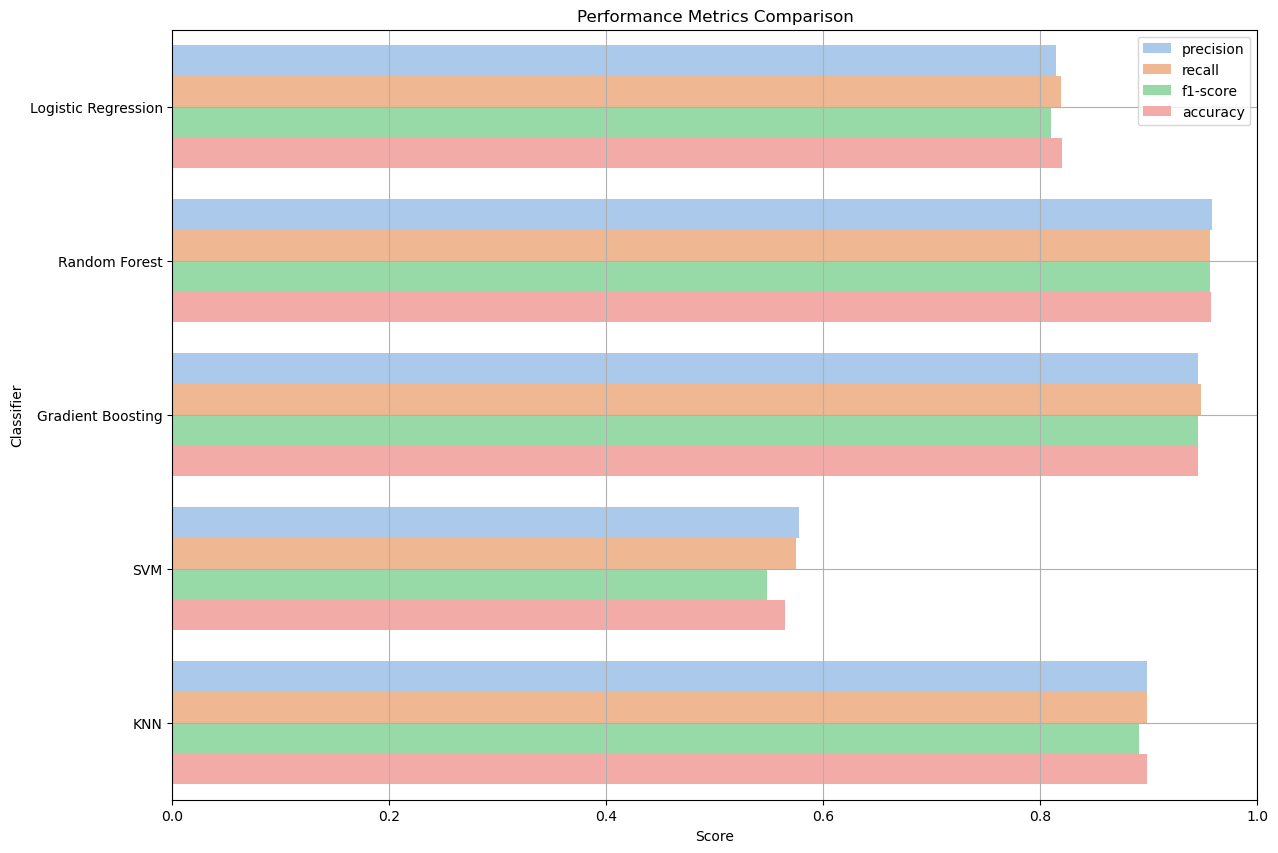

In [46]:
metrics_df_long = metrics_df.reset_index().melt(id_vars='index', value_vars=metrics, var_name='Metric', value_name='Score')
metrics_df_long.rename(columns={'index': 'Classifier'}, inplace=True)

# Plotting the metrics
plt.figure(figsize=(14, 10))
sns.barplot(x='Score', y='Classifier', hue='Metric', data=metrics_df_long, palette='pastel')
plt.title('Performance Metrics Comparison')
plt.xlabel('Score')
plt.ylabel('Classifier')
plt.legend(loc='upper right')
plt.xlim(0, 1)
plt.grid(True)
plt.show()